# ANÁLISES GRID DE BEST ESTIMATOR

## IMPORTACIÓN DE PAQUETES

In [163]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

### CARGAR LOS DATOS

In [164]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_preselecionado.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_preselecionado.pickle')

In [165]:
y.head(5)

0   37.90
1   42.20
2   47.30
3   54.80
4   46.70
Name: price, dtype: float64

In [166]:
print(x.shape)
print(y.shape)

(288, 5)
(288,)


In [167]:
x_columns = list(x.columns)
y_target = y.name

In [168]:
x

,distance_station,latitude,age,stores,mes
0,84.88,24.98,32.00,10,12
1,306.59,24.98,19.50,9,12
2,561.98,24.99,13.30,5,8
3,561.98,24.99,13.30,5,7
4,287.60,24.98,20.30,6,6
...,...,...,...,...,...
285,2175.74,24.96,18.50,3,6
286,4082.01,24.94,13.70,0,1
287,390.97,24.98,18.80,7,4
288,104.81,24.97,8.10,5,1


## MODELIZAR

### RESERVAR EL DATASET DE VALIDACIÓN

In [169]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 1)

### MODELIZAR CON LAZYPREDICT PARA VER MEJORES MODELOS

In [170]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(train_x, val_x, train_y, val_y)

print(models)

 36%|███▌      | 15/42 [00:00<00:01, 25.56it/s]

100%|██████████| 42/42 [00:01<00:00, 28.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 5
[LightGBM] [Info] Start training from score 37.120398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

Optimizamos los algoritmos, parámetros y valores para los mejores modelos analizados en el lazypredict

#### Parámetros a testear:

In [171]:
pipe = Pipeline([('algoritmo', RandomForestRegressor())])

grid = [   

            {
                'algoritmo': [XGBRegressor()],
                'algoritmo__n_jobs': [-1],
                'algoritmo__learning_rate': [0.01, 0.015, 0.025, 0.035, 0.05],
                'algoritmo__max_depth': [5, 10, 15],
                'algoritmo__min_child_weight': [1, 3, 5],
                'algoritmo__subsample': [0.8, 0.9, 1.0],
                'algoritmo__colsample_bytree': [0.8, 0.9, 1.0],
                'algoritmo__reg_alpha': [0, 0.1, 0.5],
                'algoritmo__reg_lambda': [0.01, 0.1, 0.5],
                'algoritmo__n_estimators': [100]
            }
          ]

### OPTIMIZAR LOS HIPERPARÁMETROS

####  Con grid search

In [172]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_percentage_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__colsample_bytree,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__min_child_weight,param_algoritmo__n_estimators,...,param_algoritmo__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3246,0.09,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.04,10,1,100,...,0.80,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.10,-0.11,-0.11,-0.11,-0.13,-0.11,0.01,1
2049,0.09,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.90,0.04,10,1,100,...,0.80,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.10,-0.11,-0.11,-0.11,-0.13,-0.11,0.01,2
834,0.10,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.80,0.04,10,1,100,...,0.80,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.10,-0.11,-0.11,-0.11,-0.13,-0.11,0.01,2
3283,0.09,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.04,10,3,100,...,0.90,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.11,-0.12,-0.10,-0.10,-0.13,-0.11,0.01,4
3327,0.09,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.04,15,1,100,...,0.80,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.10,-0.11,-0.11,-0.11,-0.13,-0.11,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,0.07,0.01,0.01,0.01,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.01,5,1,100,...,1.00,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.35,-0.34,-0.38,-0.39,-0.33,-0.36,0.02,3641
2609,0.08,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.01,15,1,100,...,1.00,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.35,-0.34,-0.38,-0.39,-0.33,-0.36,0.02,3642
2528,0.07,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.01,10,1,100,...,1.00,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.35,-0.34,-0.38,-0.39,-0.33,-0.36,0.02,3642
2519,0.08,0.00,0.01,0.00,"XGBRegressor(base_score=None, booster=None, ca...",1.00,0.01,10,1,100,...,1.00,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.35,-0.34,-0.38,-0.39,-0.33,-0.36,0.02,3644


In [173]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.035,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [174]:
modelo.best_params_

{'algoritmo': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'algoritmo__colsample_bytree': 1.0,
 'algoritmo__learning_rate': 0.035,
 'algoritmo__max_depth': 10,
 'algoritmo__min_child_weight': 1,
 'algoritmo__n_estimators': 100,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0,
 'algoritmo__reg_

In [175]:
modelo.best_score_

-0.11353277947917047

### CREAR PICKLE DE MODELO.BEST_ESTIMATOR y PARÁMETROS

In [176]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [177]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### EVALUAR SOBRE EL TRAIN

In [178]:
pred = modelo.best_estimator_.predict(train_x)
t_mape = mean_absolute_percentage_error(train_y, pred)
t_coef_determinacion = r2_score(train_y,pred)
t_mae = mean_absolute_error(train_y, pred)
t_rmse =  mean_squared_error(train_y,pred,squared='False')

print("%mape:", t_mape )
print("Coeficiente de determinación:", t_coef_determinacion)
print("MAE:", t_mae)
print("RMSE:",t_rmse)


%mape: 0.038115756655974414
Coeficiente de determinación: 0.9714126832177439
MAE: 1.5573965774839789
RMSE: 5.279606126881046


### PREDECIR SOBRE LA VALIDACIÓN

In [179]:
pred = modelo.best_estimator_.predict(val_x)

### EVALUAR SOBRE LA VALIDACIÓN

In [180]:
v_mape = mean_absolute_percentage_error(val_y, pred)
v_coef_determinacion = r2_score(val_y,pred)
v_mae = mean_absolute_error(val_y, pred)
v_rmse =  mean_squared_error(val_y,pred,squared='False')


print("%mape:", v_mape)
print("Coeficiente de determinación:", v_coef_determinacion)
print("MAE:", v_mae)
print("RMSE:", v_rmse)

%mape: 0.1258204222962123
Coeficiente de determinación: 0.7367762691501476
MAE: 4.67146246679898
RMSE: 39.7050814023743


#### Gráfico entre la diferencia entre la validación y el original

In [181]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='price').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['price']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False).head(10)

,index,price,pred,dif
26,165,32.40,50.24,17.84
16,180,26.50,43.84,17.34
50,242,41.20,24.64,16.56
86,273,67.70,52.11,15.59
82,86,60.70,45.42,15.28
70,62,48.00,35.80,12.20
80,109,55.50,43.75,11.75
83,231,62.10,51.60,10.50
79,42,55.00,44.67,10.33
64,241,46.60,36.37,10.23


- Quitaremos estos atípicos para mejor el modelo (index 85 y 273)

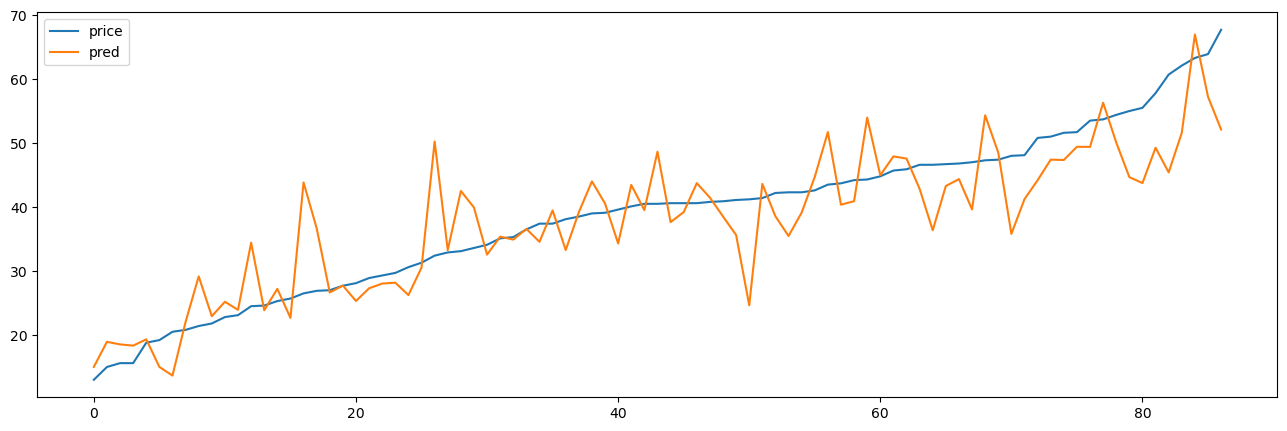

In [182]:
df_pred[['price','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

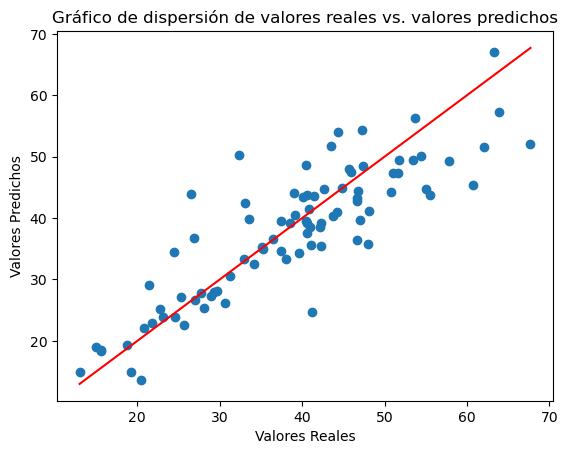

In [183]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(val_y, pred)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

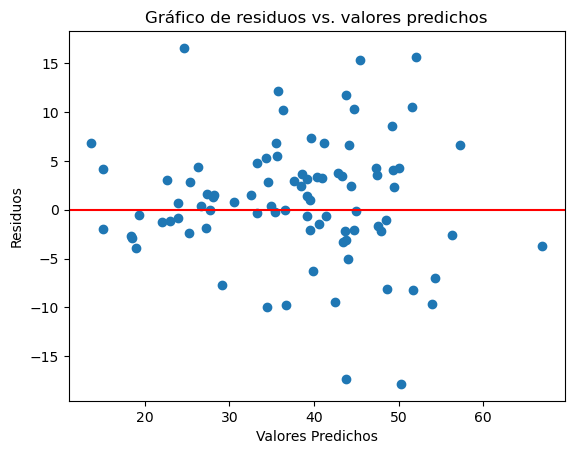

In [184]:
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

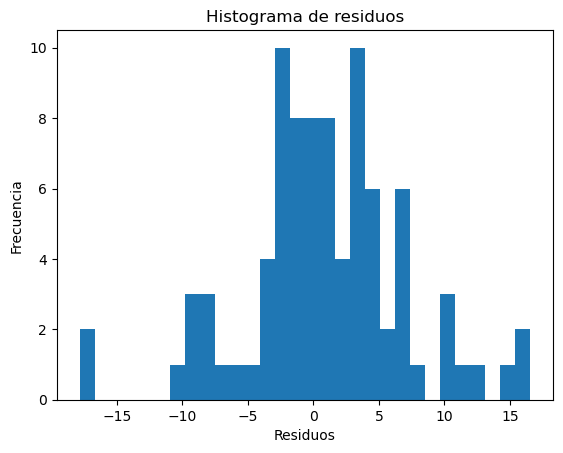

In [185]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

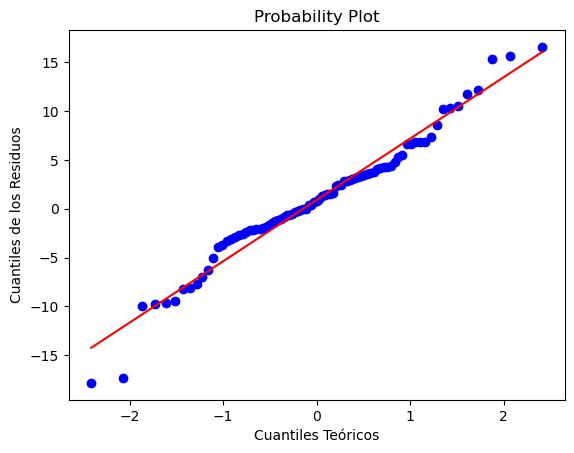

In [186]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

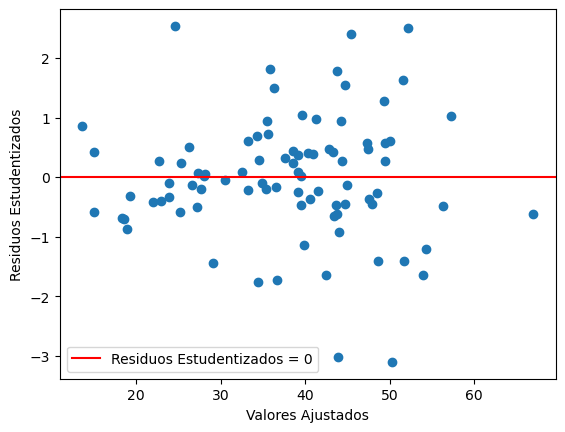

In [187]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

In [188]:
# Paso 3: Definir umbral para Valores Atípicos
std_dev_threshold = 2  # Umbral en desviaciones estándar

# Paso 4: Identificación de Atípicos
outliers_indices = np.where(np.abs(residuos) > std_dev_threshold * np.std(residuos))[0]
outliers_indices

array([ 7, 33, 39, 54, 84], dtype=int64)

In [189]:
val_y.iloc[3]

46.8

# GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [190]:
version_estimator = '_v06'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'XGBRegressor_v06.pickle'

In [191]:
m_best_estimator

'XGBRegressor'

In [192]:
ruta_pipe_entrenamiento = '../../04_Modelos/01_Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


### Guardar la información del estimador

In [193]:
# Añadir comentarios sobre el modelo

comentarios = "Quitamos el valor atípico del modelo y hiperparametrizamos"


In [194]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_%mape': t_mape, 
               't_Coef._determinacion': t_coef_determinacion, 
               't_mae': t_mae, 
               't_rmse': t_rmse, 
               'v_%mape':  v_mape, 
               'v_Coef._determinacion': v_coef_determinacion, 
               'v_mae': v_mae, 
               'v_rmse': v_rmse,
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                              XGBRegressor
m_Best_paramans          {'algoritmo': XGBRegressor(base_score=None, bo...
m_Best_Score                                          -0.11353277947917047
t_%mape                                                               0.04
t_Coef._determinacion                                                 0.97
t_mae                                                                 1.56
t_rmse                                                                5.28
v_%mape                                                               0.13
v_Coef._determinacion                                                 0.74
v_mae                                                                 4.67
v_rmse                                                               39.71
comentarios              Quitamos el valor atípico del modelo y hiperpa...
predictoras_X               [distance_station, latitude, age, stores, mes]
target_y                 

In [195]:
df_best = pd.read_excel('../../04_Modelos/01_Best_estimator/Best_estimator.xlsx',index_col=0)


In [196]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/01_Best_estimator/Best_estimator.xlsx')